# Pytorch: Optim
https://pytorch.org/tutorials/beginner/examples_nn/polynomial_optim.html

In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib



PyTorch: optim
--------------

A third order polynomial, trained to predict $y=\sin(x)$ from $-\pi$
to $pi$ by minimizing squared Euclidean distance.

This implementation uses the nn package from PyTorch to build the network.

Rather than manually updating the weights of the model as we have been doing,
we use the optim package to define an Optimizer that will update the weights
for us. The optim package defines many optimization algorithms that are commonly
used for deep learning, including SGD+momentum, RMSProp, Adam, etc.



In [3]:
import math

import torch


# Create Tensors to hold input and outputs.
x = torch.linspace(-math.pi, math.pi, 2000)
y = torch.sin(x)

# Prepare the input tensor (x, x^2, x^3).
p = torch.tensor([1, 2, 3])
xx = x.unsqueeze(-1).pow(p)

In [4]:
# Use the nn package to define our model and loss function.
model = torch.nn.Sequential(torch.nn.Linear(3, 1),
                            torch.nn.Flatten(0, 1))

loss_fn = torch.nn.MSELoss(reduction = 'sum')

### optimizer

In [5]:
# Use the optim package to define an Optimizer that will update the weights of
# the model for us. Here we will use RMSprop; the optim package contains many other
# optimization algorithms. The first argument to the RMSprop constructor tells the
# optimizer which Tensors it should update.
learning_rate = 1e-3
optimizer = torch.optim.RMSprop(model.parameters(), lr = learning_rate)

In [6]:
for t in range(2000):
    # Forward pass: compute predicted y by passing x to the model.
    y_pred = model(xx)

    # Compute and print loss.
    loss = loss_fn(y_pred, y)

    if t % 100 == 99:
        print(t, loss.item())

    # Before the backward pass, use the optimizer object to zero all of the
    # gradients for the variables it will update (which are the learnable
    # weights of the model). This is because by default, gradients are
    # accumulated in buffers( i.e, not overwritten) whenever .backward()
    # is called. Checkout docs of torch.autograd.backward for more details.
    optimizer.zero_grad()

    # Backward pass: compute gradient of the loss with respect to model
    # parameters
    loss.backward()

    # Calling the step function on an Optimizer makes an update to its
    # parameters
    optimizer.step()

99 8883.9365234375
199 3720.063720703125
299 1803.00830078125
399 894.4590454101562
499 471.4889221191406
599 304.27777099609375
699 221.4602813720703
799 154.96328735351562
899 100.15933227539062
999 59.48484802246094
1099 32.619178771972656
1199 17.431814193725586
1299 12.133633613586426
1399 9.045233726501465
1499 8.833117485046387
1599 8.83503532409668
1699 8.896839141845703
1799 8.969927787780762
1899 8.908695220947266
1999 8.90212345123291


In [7]:
linear_layer = model[0]
linear_layer

Linear(in_features=3, out_features=1, bias=True)

In [10]:
print(f'Result: y = {linear_layer.bias.item()} + \
{linear_layer.weight[:, 0].item()} * x + \
{linear_layer.weight[:, 1].item()} * x**2 + \
{linear_layer.weight[:, 2].item()} * x**3')

Result: y = 0.0006462933961302042 + 0.8571839332580566 * x + 0.0006457038689404726 * x**2 + -0.09288208931684494 * x**3


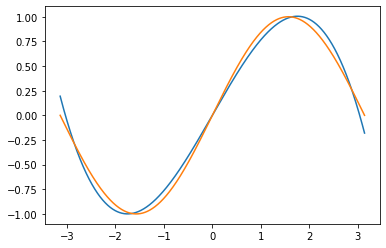

In [16]:
y = linear_layer.bias.item() + \
    linear_layer.weight[:, 0] * x**1 + \
    linear_layer.weight[:, 1] * x**2 + \
    linear_layer.weight[:, 2] * x**3

plt.plot(x, y.detach()); 
plt.plot(x, np.sin(x)); 